Importation de la base de données & packages

In [44]:
# Importation des packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [8]:
# Importation et affichage de la BDD

df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Large vue sur la BDD

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Afficher les valeurs catégorique
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
# Le nombres de valeurs manquantes pour chaque colonne
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Remplissage des valeurs manquantes

In [13]:
# Diviser la BDD en deux partie , variable catégorique et variable numérique

cat_data = []  # Stocker les variables catégoriques
num_data = []  # Stocker les variables numériques

for i,c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])

In [14]:
cat_data

[0      LP001002
 1      LP001003
 2      LP001005
 3      LP001006
 4      LP001008
          ...   
 609    LP002978
 610    LP002979
 611    LP002983
 612    LP002984
 613    LP002990
 Name: Loan_ID, Length: 614, dtype: object,
 0        Male
 1        Male
 2        Male
 3        Male
 4        Male
         ...  
 609    Female
 610      Male
 611      Male
 612      Male
 613    Female
 Name: Gender, Length: 614, dtype: object,
 0       No
 1      Yes
 2      Yes
 3      Yes
 4       No
       ... 
 609     No
 610    Yes
 611    Yes
 612    Yes
 613     No
 Name: Married, Length: 614, dtype: object,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 609     0
 610    3+
 611     1
 612     2
 613     0
 Name: Dependents, Length: 614, dtype: object,
 0          Graduate
 1          Graduate
 2          Graduate
 3      Not Graduate
 4          Graduate
            ...     
 609        Graduate
 610        Graduate
 611        Graduate
 612        Graduate
 613   

In [15]:
# Transoformer la nouvelles liste des valeurs catégorique en un DataFrame

cat_data = pd.DataFrame(cat_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [16]:
# Transformer la nouvelle liste de valeurs numérique en un DataFrame
num_data = pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [17]:
# Remplir les valeurs manquates
# Pour les variable catégorique on va remplacer les valeurs manquantes par les valeurs qui se répètent le plus

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0] )) # x.value_counts() --> Trie les valeurs manquantes en ordre décroissant, index[0] --> Choisis l'index 0 comme c'est la colonne qui contient plus de valeurs
cat_data.isnull().sum().any()

False

In [18]:
# Pour les variables numériques, on va remplacer les valeurs manquates par la valeurs précèdente de la même colonne

num_data.fillna(method='bfill',inplace=True) 
num_data.isnull().sum().any()

False

In [19]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [20]:
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

Data Processing 

In [21]:
# Transformation de la colonne Loan Status en numérique

target_value = {'Y':1,'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1, inplace=True)
target = target.map(target_value)

target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [22]:
# Remplacer les valeurs catégorielles par des valeurs numériques

# Initialisation du label encoder
LE = LabelEncoder()

In [23]:
# Remplacement des valeurs catégoriques par des valeurs numériques  
for i in cat_data:
  cat_data[i] = LE.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [24]:
# Supprimer le Loan ID car elle ne sert à rien

cat_data = df.drop('Loan_ID',axis=1,inplace=True)

In [25]:
# Concaténation des variables numériques et variables catégoriques : num_data & cat_data

X = pd.concat([cat_data,num_data],axis=1)
y = target

In [26]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [27]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Analyse exploiratoire

In [28]:
# Combien de crédits sont accéptés et refusés
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [29]:
# La BDD complètement nettoyé

df = pd.concat([cat_data,num_data,target],axis=1)

Le pourcentage des crédits accordés est : 31.27035830618892 %
Le pourcentage des crédits refusés est : 68.72964169381108 %


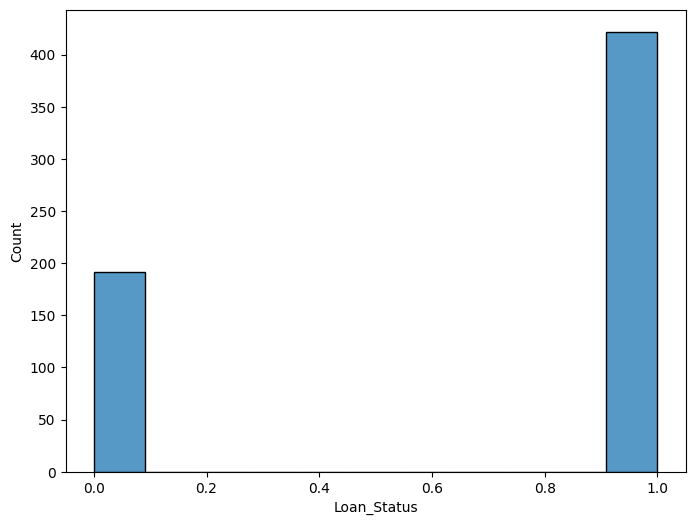

In [30]:
# Visualisation des données 
plt.figure(figsize=(8,6))
sns.histplot(target)
yes = target.value_counts()[0] /len(target) *100
no = target.value_counts()[1] /len(target) *100
print(f'Le pourcentage des crédits accordés est : {yes} %')
print(f'Le pourcentage des crédits refusés est : {no} %')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


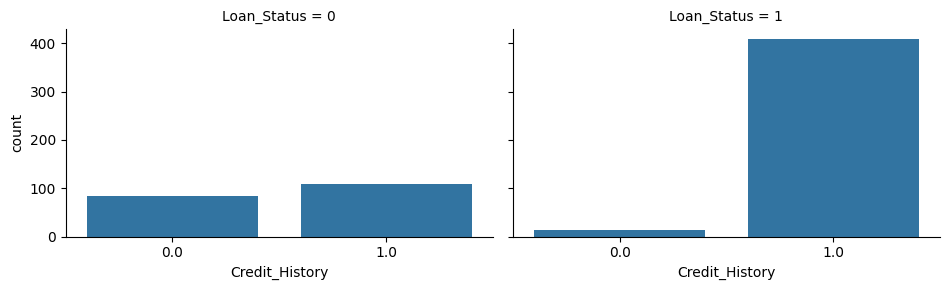

In [31]:
# Historique de crédits acceptés et crédits refusées

grid = sns.FacetGrid(df,col='Loan_Status',aspect=1.6)
grid.map(sns.countplot,'Credit_History')

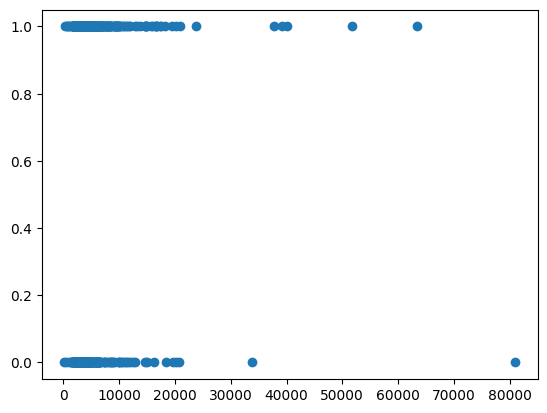

In [32]:
# Revenue du demandeur

plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

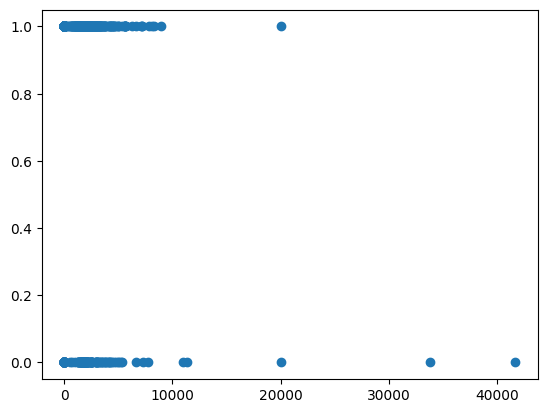

In [33]:
# Revenue du Conjoint

plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [34]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,3833.5,268.0,132.5,360.0,1.0
1,3812.5,1239.5,127.5,360.0,1.0


Création du model de machine learning

In [42]:
# Diviser les données en données entrainement et données de test

#Instanciation de la methode 
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train,test in sss.split(X,y):
  X_train,X_test = X.iloc[train],X.iloc[test] 
  y_train,y_test = y.iloc[train],y.iloc[test] 

print('X_train taille:', X_train.shape)
print('X_test taille:', X_test.shape)
print('y_train taille:', y_train.shape)
print('y_test taille:', y_test.shape)

X_train taille: (491, 5)
X_test taille: (123, 5)
y_train taille: (491,)
y_test taille: (123,)


In [47]:
# Appliquation des algorithme de machine learning : Logistic Regression, KNN, DecisionTree

# Importation des modèles 
models ={
  'LogisticRegression' : LogisticRegression(random_state=42),
  'KNeighborsClassifier' : KNeighborsClassifier() ,
  'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1,random_state=42),
 }

# La fonction de précision

def accu(y_true,y_pred,retu=False):
  acc = accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'La précision du model est: {acc}')

# La fonction d'évaluation des modèles

def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test, model.predict(X_test))
    print('-' *30)

# Appliquer les modèles

train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
La précision du model est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du model est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La précision du model est: 0.8455284552845529
------------------------------


Le model le plus performant est la régression logistique